In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
uber = pd.read_csv('C:\\Users\\HP\\Desktop\\uber.csv')

uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
uber.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
uber_2 = uber.drop(['Unnamed: 0','key'],axis=1)
uber_2.dropna(axis=0,inplace=True)

In [6]:
uber_2.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [7]:
def haversine (lon_1, lon_2, lat_1, lat_2):
    
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians
    
    
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    

    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + 
                                      np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    
    return km

In [8]:
uber_2['Distance']= haversine(uber_2['pickup_longitude'],uber_2['dropoff_longitude'],
                             uber_2['pickup_latitude'],uber_2['dropoff_latitude'])

uber_2['Distance'] = uber_2['Distance'].astype(float).round(2)

Text(0, 0.5, 'fare_amount')

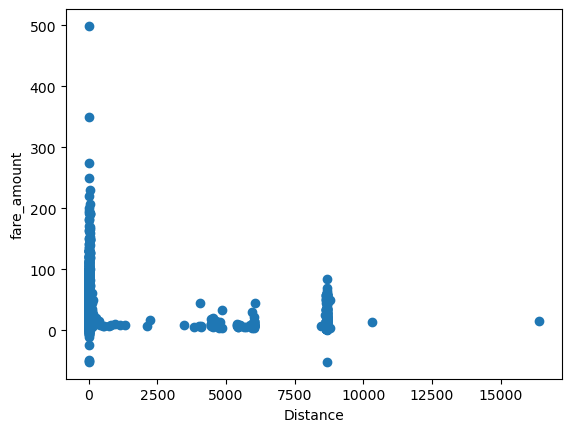

In [9]:
plt.scatter(uber_2['Distance'], uber_2['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [10]:
uber_2.drop(uber_2[uber_2['Distance'] > 60].index, inplace = True)
uber_2.drop(uber_2[uber_2['Distance'] == 0].index, inplace = True)
uber_2.drop(uber_2[uber_2['fare_amount'] == 0].index, inplace = True)
uber_2.drop(uber_2[uber_2['fare_amount'] < 0].index, inplace = True)

In [11]:
uber_2.drop(uber_2[(uber_2['fare_amount']>100) & (uber_2['Distance']<1)].index, inplace = True )
uber_2.drop(uber_2[(uber_2['fare_amount']<100) & (uber_2['Distance']>100)].index, inplace = True )

In [12]:
uber_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193481 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        193481 non-null  float64
 1   pickup_datetime    193481 non-null  object 
 2   pickup_longitude   193481 non-null  float64
 3   pickup_latitude    193481 non-null  float64
 4   dropoff_longitude  193481 non-null  float64
 5   dropoff_latitude   193481 non-null  float64
 6   passenger_count    193481 non-null  int64  
 7   Distance           193481 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 13.3+ MB


Text(0, 0.5, 'fare_amount')

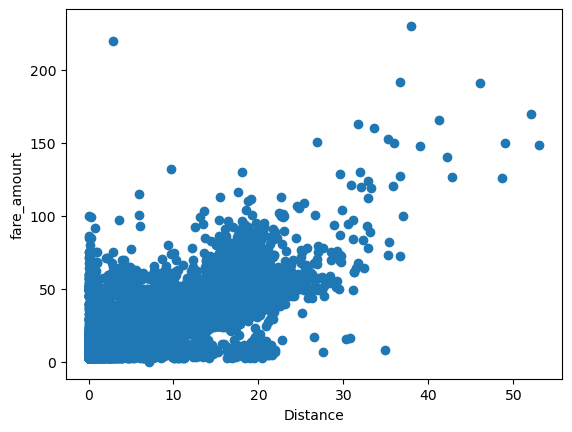

In [13]:
plt.scatter(uber_2['Distance'], uber_2['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [14]:
corr = uber_2.corr()

corr.style.background_gradient(cmap='BuGn')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
fare_amount,1.000000,0.012070,-0.008682,0.010555,-0.008695,0.013508,0.893050
pickup_longitude,0.012070,1.000000,-0.949099,0.999883,-0.993975,0.009174,0.005337
pickup_latitude,-0.008682,-0.949099,1.000000,-0.949095,0.954759,-0.009219,0.003232
dropoff_longitude,0.010555,0.999883,-0.949095,1.000000,-0.993962,0.009168,0.004406
dropoff_latitude,-0.008695,-0.993975,0.954759,-0.993962,1.000000,-0.009266,-0.002122
passenger_count,0.013508,0.009174,-0.009219,0.009168,-0.009266,1.000000,0.007441
Distance,0.893050,0.005337,0.003232,0.004406,-0.002122,0.007441,1.000000


In [15]:
X = uber_2['Distance'].values.reshape(-1, 1)        #Independent Variable
y = uber_2['fare_amount'].values.reshape(-1, 1)

In [16]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(y)
print(y_std)

x_std = std.fit_transform(X)
print(x_std)

[[-0.4011162 ]
 [-0.38006651]
 [ 0.16722527]
 ...
 [ 2.06169682]
 [ 0.33562274]
 [ 0.29352337]]
[[-0.46599576]
 [-0.24929862]
 [ 0.46746884]
 ...
 [ 2.63721838]
 [ 0.05074357]
 [ 0.57303924]]


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))

Training set score: 0.80
Test set score: 0.8006071


In [19]:
y_pred = l_reg.predict(X_test)
df = {'Actual': y_test, 'Predicted': y_pred}


In [20]:

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.23979020298617268
Mean Absolute % Error: 2.7124408628068992
Mean Squared Error: 0.19845894128014688
Root Mean Squared Error: 0.4454873076532561


In [21]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

regressor.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Temp\ipykernel_16596\2977290372.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [22]:
Y_pred = regressor.predict(X_test)
Y_pred

array([-0.67828944, -0.6281672 ,  0.22542736, ..., -0.40141207,
       -0.40329219, -0.47855017])

In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

Mean Absolute Error: 0.24162461813439187
Mean Absolute % Error: 2.465400380000005
Mean Squared Error: 0.20217934629141932
Root Mean Squared Error: 0.44964357694892
